In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Read the CSV file into a pandas dataframe
df = pd.read_csv('svmnonlinear.csv')
df

,x1,x2,y
0,0.2,0.3,0
1,-0.5,-0.7,1
2,-0.1,0.9,0
3,0.7,-0.6,1
4,-0.8,0.5,0
5,0.6,0.8,1
6,-0.2,-0.1,0
7,0.4,-0.9,1
8,-0.9,-0.3,0
9,0.1,-0.6,1


In [22]:
X = df[['x1', 'x2']].values
y = df['y'].values

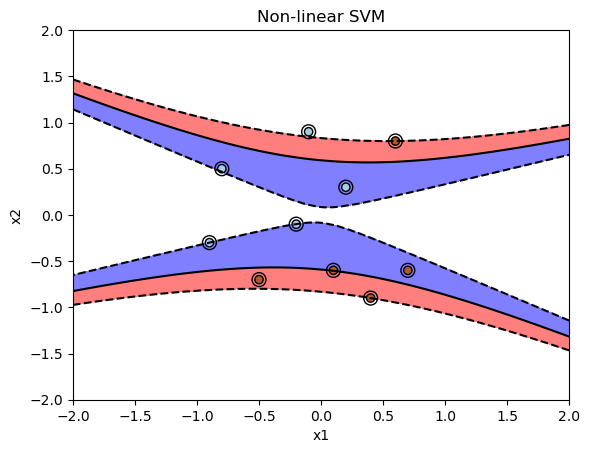

In [24]:
# Create a non-linear SVM classifier with a Gaussian RBF kernel
clf = SVC(kernel='poly', gamma='scale',degree=2)

# Train the SVM classifier on the training data
clf.fit(X, y)

# Visualize the data and the decision boundary
x1 = np.linspace(-2, 2, 100)
x2 = np.linspace(-2,2, 100)
xx1, xx2 = np.meshgrid(x1, x2)
Z = clf.decision_function(np.c_[xx1.ravel(), xx2.ravel()])
Z = Z.reshape(xx1.shape)

plt.contourf(xx1, xx2, Z, levels=[-1, 0, 1], alpha=0.5, colors=['blue', 'red'])
plt.contour(xx1, xx2, Z, levels=[-1, 0, 1], linestyles=['--', '-', '--'], colors='k')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='black')
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='black')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Non-linear SVM')
plt.show()
